# Тестовое задание для АО "НИИАС"
Предоставлена выборка номеров вагонов с аннотацией.

## Основная задача

Построить модель распознавания изображений.

## Описание данных

1. images - изображения с восьмизначными номерами вагонов.
2. labels - аннотации вида "класс xmin width ymin heigh".

## Метрика

Определить качество распознавания с помощью метрики mAP.

## План реализации



1.   Загрузка изображений и анотаций с платформы Roboflow
2.   Предобработка данных на платформе Roboflow для обучения на архитектуре YoloV8
3.   Обучение модели на архитектуре YoloV8m
4.    Вывод


In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.9/756.9 kB 8.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [2]:
!pip install Roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.1

## Инструменты

In [3]:
import zipfile
import os

from google.colab import drive

from roboflow import Roboflow

from ultralytics import YOLO

from PIL import Image
from IPython.display import display, Image
from IPython import display
display.clear_output()

In [4]:
# подключаем гугл диск
drive.mount('/content/drive')

Mounted at /content/drive


### Загрузка данных

In [5]:
# загрузим обработанные данные с платформы Roboflow
rf = Roboflow(api_key="pauBBR5fzrbWOm7f2Htm")
project = rf.workspace("aleksandrurvanov").project("trainnumbers")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.15, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to TrainNumbers-1 in yolov8:: 100%|██████████| 19822/19822 [00:02<00:00, 8117.26it/s] 


При предобработке была применена автоориентация изображений с масштабированием до 640х640 (масштаб обучения предобученнной модели). Экспериментально проверил, если оставлять оригинальный масштаб изображений при обучении, получаем метрику на 5-8% меньше. Так как, на платформе Roboflow предобаботка бесплатна до 10000 изображений, поэтому наш датасет составит 9907 изображений.


### Обучение модели

 Датасет разделен на обучающую и тестовую (80/20). Обучение будет производится на предобученнной модели YoloV8m (medium) на 20 эпохах.

In [7]:
# обучение модели на 20 эпохах
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640 amp=False

100% 49.7M/49.7M [00:00<00:00, 332MB/s]
Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/TrainNumbers-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cr

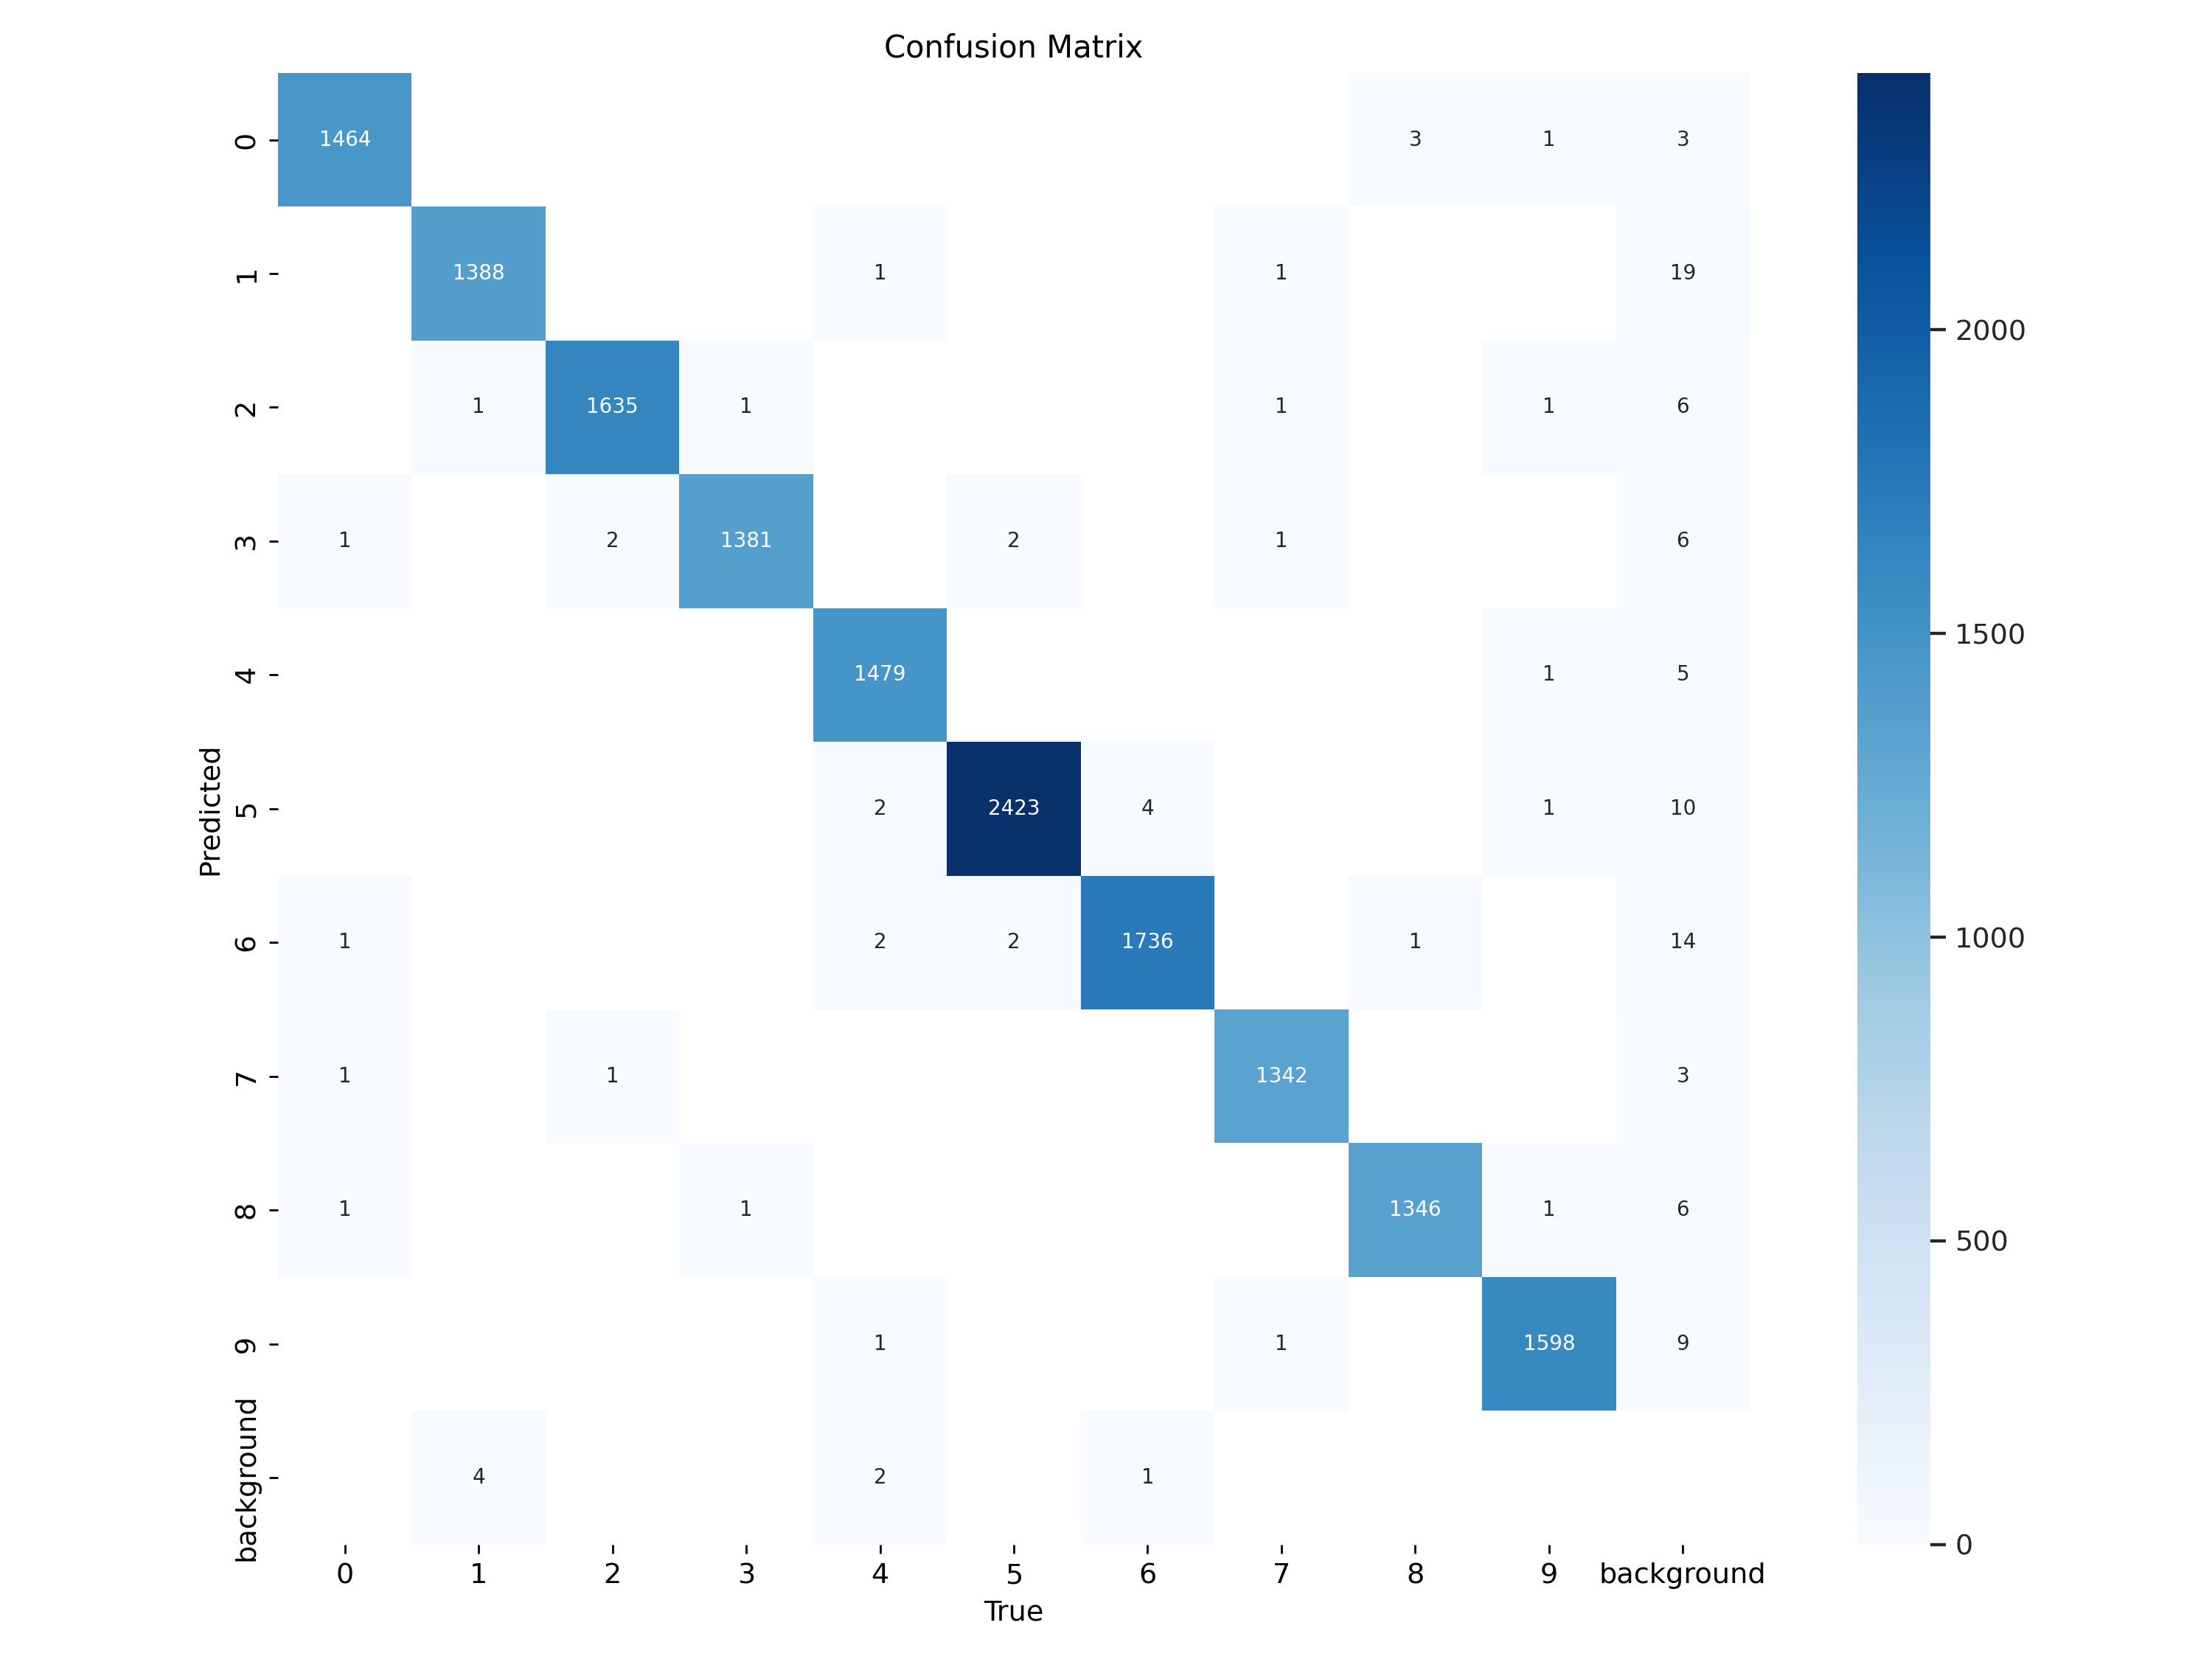

In [8]:
# выведем матрицу распознования
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

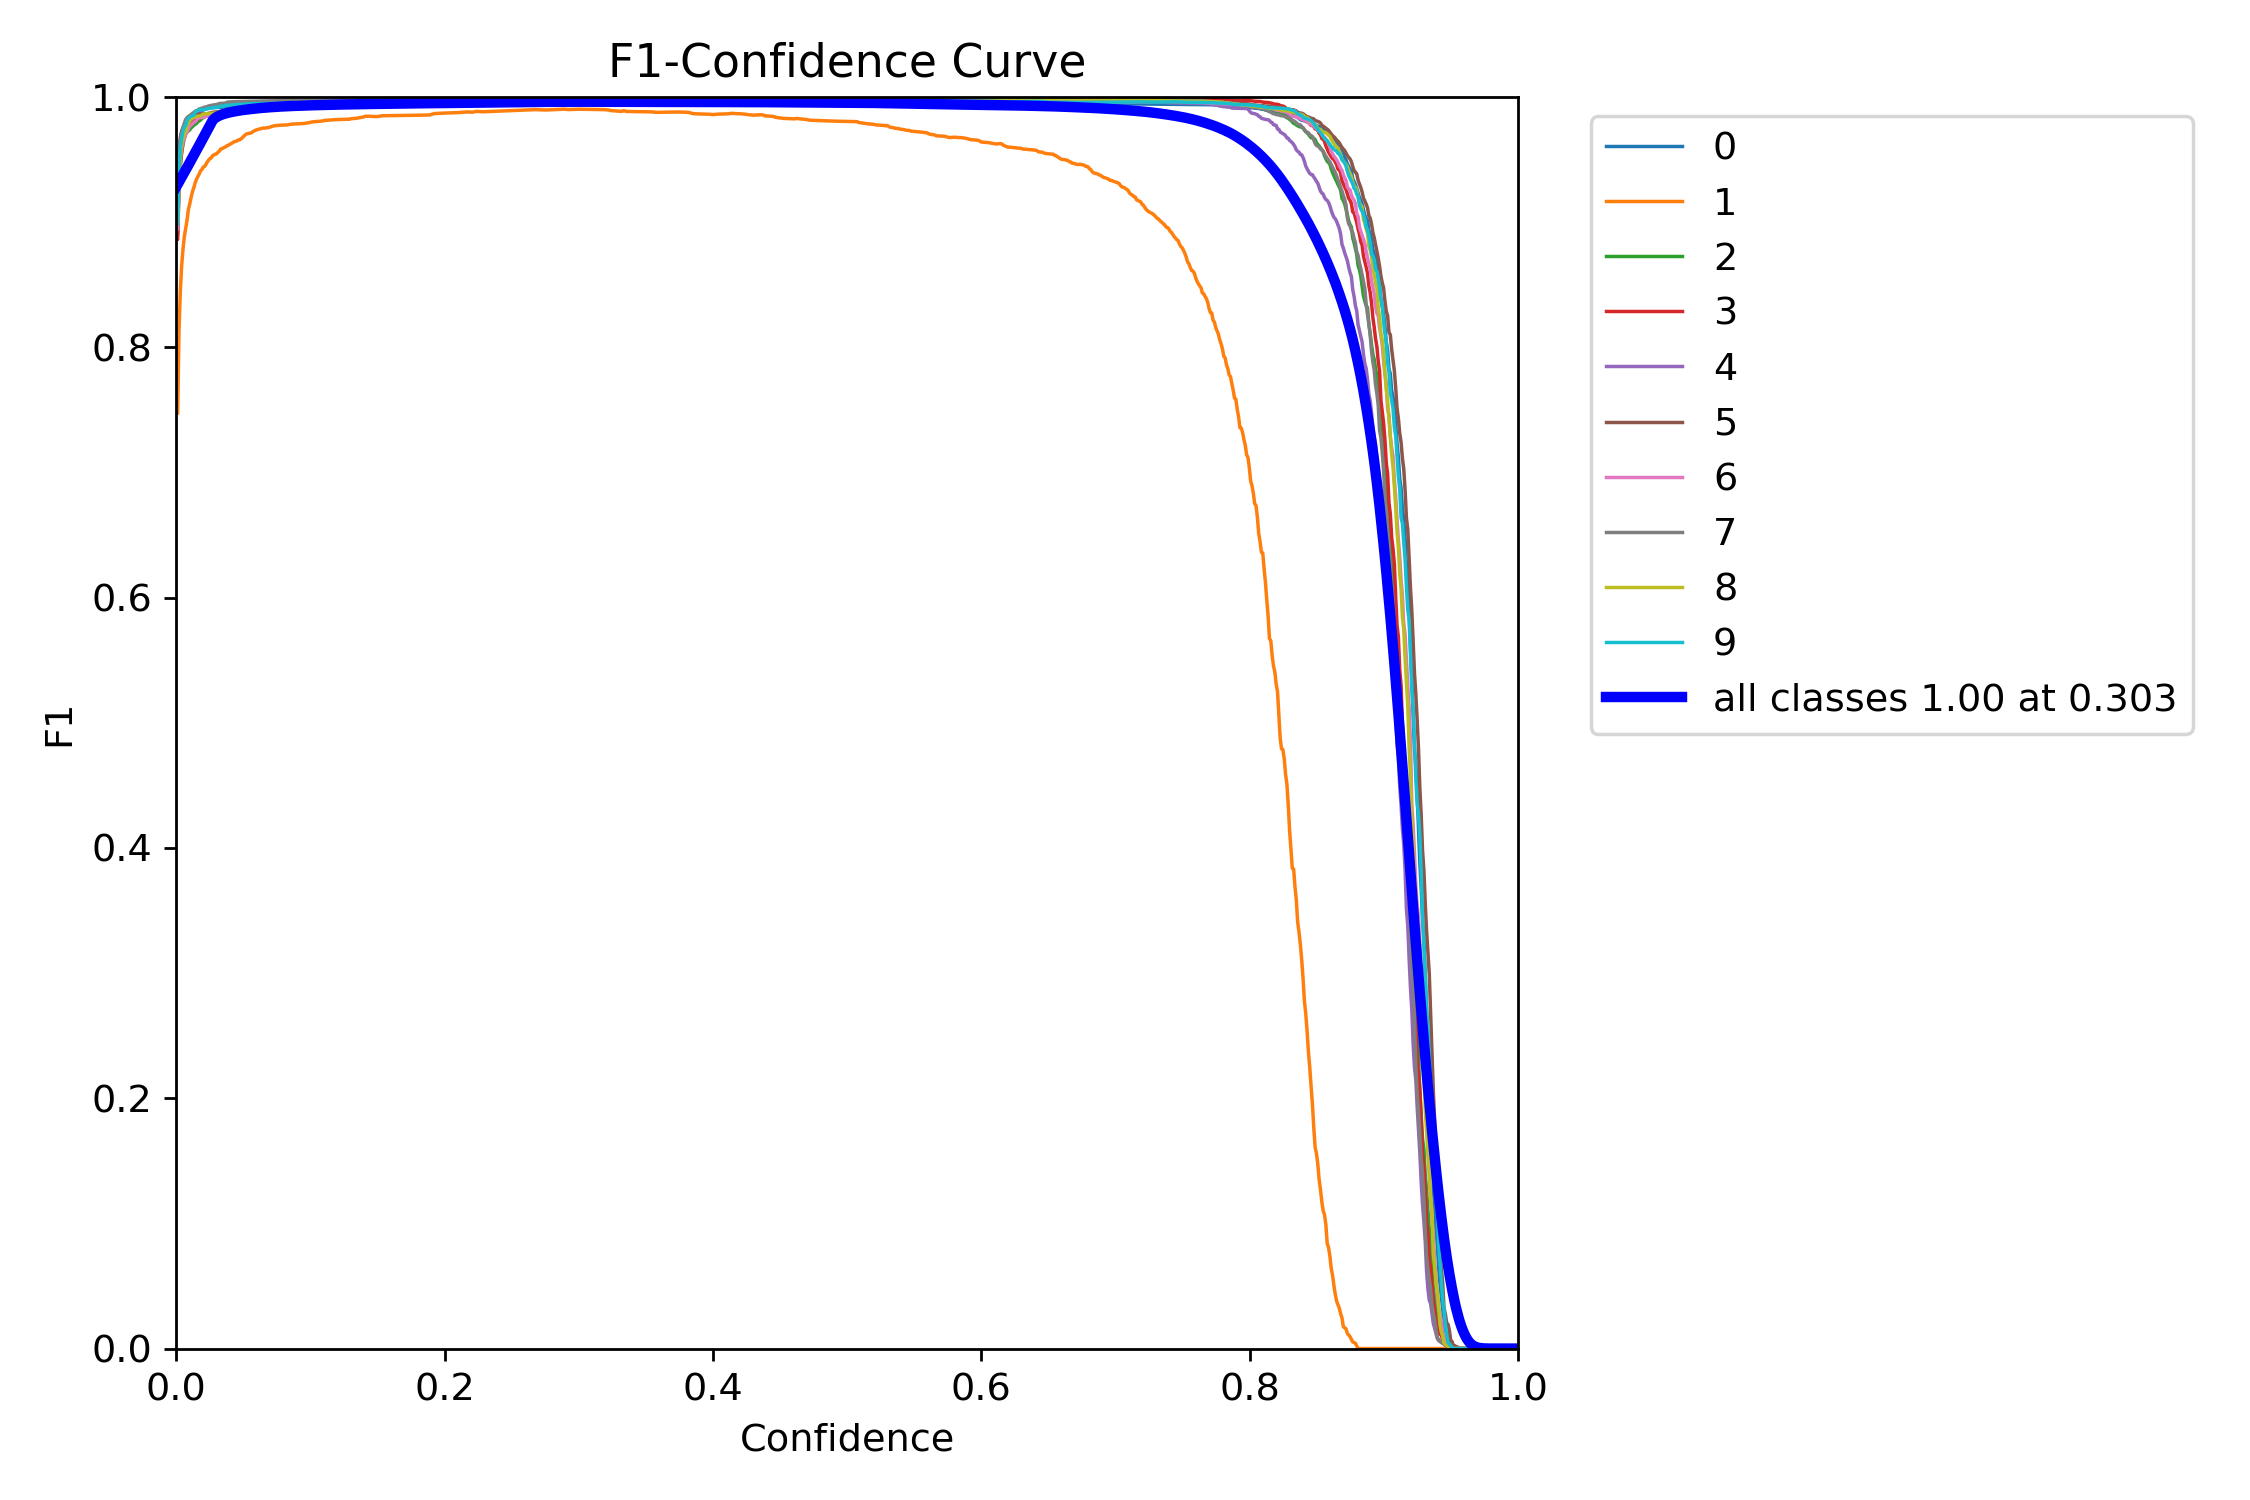

In [14]:
Image(filename=f'/content/runs/detect/train/F1_curve.png', width=1000)

Как видим, хуже всего распазнается "1"

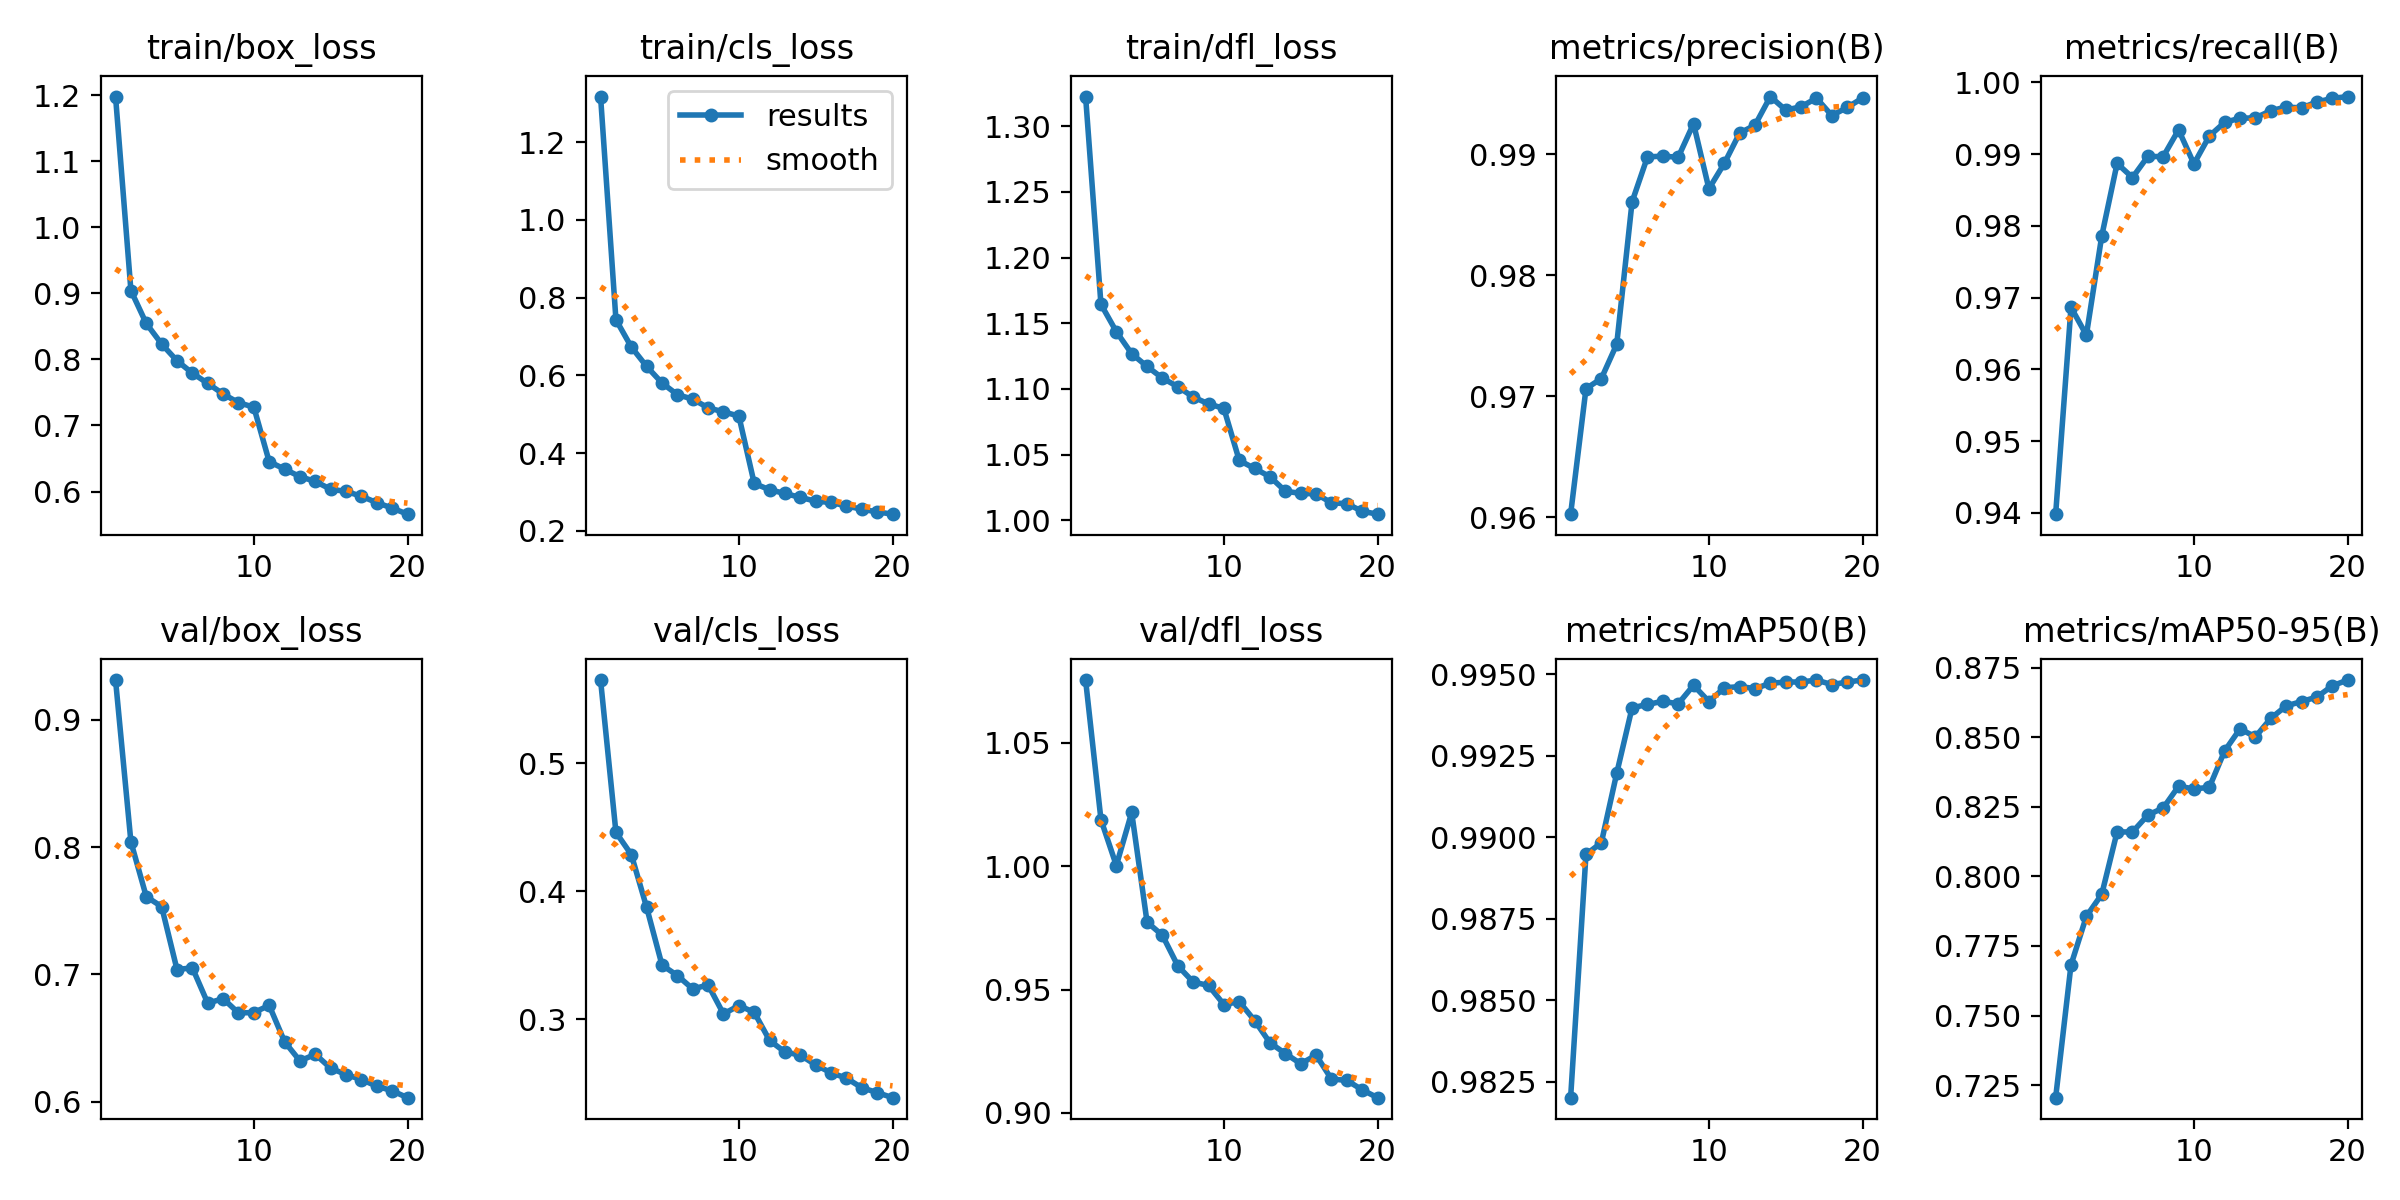

In [23]:
# выведем графики обучения и тестирования по метрикам
Image(filename=f'/content/runs/detect/train/results.png', width=1000)

In [15]:
# распознаем тестовые номера вагонов
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images

Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs

image 1/1984 /content/TrainNumbers-1/test/images/0_rect_sbigned_KCF__png.rf.613c9c47645b950a9d2790ad80bb6c2d.jpg: 640x640 1 0, 1 1, 1 3, 1 4, 1 5, 3 6s, 9.2ms
image 2/1984 /content/TrainNumbers-1/test/images/1571128740857_png.rf.f82f5c8304c05ab9455744e82f06d0b5.jpg: 640x640 3 3s, 1 4, 1 5, 1 6, 1 8, 1 9, 10.1ms
image 3/1984 /content/TrainNumbers-1/test/images/1571128744682_png.rf.24550681ad8871a41a876e8b91cf8864.jpg: 640x640 3 3s, 1 4, 1 5, 1 6, 1 8, 1 9, 9.5ms
image 4/1984 /content/TrainNumbers-1/test/images/1571128770614_png.rf.e8085e30a2531cb2c4e4dc7840c814dc.jpg: 640x640 1 1, 2 2s, 1 5, 3 6s, 1 8, 9.1ms
image 5/1984 /content/TrainNumbers-1/test/images/1571134515240_png.rf.89787bcd344cfc9a53fca2209e3f3e73.jpg: 640x640 2 0s, 1 3, 2 4s, 2 6s, 1 8, 9.1ms
image 6/1984 /content/TrainNumbers-1/test/images/1571134528831_pn

In [16]:
import glob
from IPython.display import Image, display

In [22]:
# выведем 20 номеров для визуальной проверки
for i, image_path in enumerate(glob.glob('/content/runs/detect/predict/**/*.jpg', recursive=True)):
    if i < 20:
        display(Image(filename=image_path, height=300, width=500))
        print("\n")

Output hidden; open in https://colab.research.google.com to view.

### Вывод

  Модель YoloV8m показывает хорошие результаты,
 производительность модели на разных уровнях сложности обнаружения на тестовой выборке mAP50-95 = 0.87, mAP50 = 0.995. Модель имеет небольшие трудности с распознанием единиц при сложном уровне обнаружения, что является следствием плохого качества изображения этого класса распознания.